In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
h = fits.open('Morph Range Ell Flag 2')
i = fits.open('Morph Range Spiral Flag 2')

In [3]:
h.info()
i.info()

Filename: Morph Range Ell Flag 2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (3201,)   uint8   
  1  Joined        1 BinTableHDU     90   6151R x 34C   [K, D, D, K, 2A, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, J, J, J, I, I, D, D]   
Filename: Morph Range Spiral Flag 2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (3201,)   uint8   
  1  Joined        1 BinTableHDU     90   6346R x 34C   [K, D, D, K, 2A, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, J, J, J, I, I, D, D]   


In [4]:
H = h[1].data
I = i[1].data

c = 300000
H_0 = 70

MagI_E = np.array(H.field(12))
MagR_E = np.array(H.field(11))
Z_E = np.array(H.field(22))
MagI_S = np.array(I.field(12))
MagR_S = np.array(I.field(11))
Z_S = np.array(I.field(22))

print(Z_S)

[0.38810629 0.39877731 0.25173244 ... 0.06015407 0.18600339 0.1782027 ]


In [5]:
Dis_E = (Z_E*c/H_0)*10**6
Dis_S = (Z_S*c/H_0)*10**6

MI_E = MagI_E + 5 - 5*np.log10(Dis_E)
MR_E = MagR_E + 5 - 5*np.log10(Dis_E)
MI_S = MagI_S + 5 - 5*np.log10(Dis_S)
MR_S = MagR_S + 5 - 5*np.log10(Dis_S)

Colour_E = MR_E - MI_E
Colour_S = MR_S - MI_S

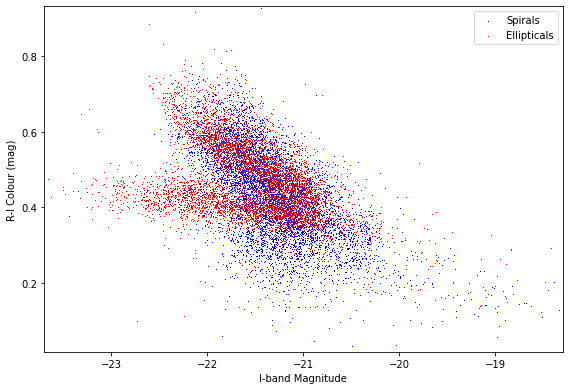

In [8]:
plt.figure(1).add_axes((0,0,1.2,1.2))

plt.scatter(MI_S, Colour_S, s=1, marker="s", linewidth=0, color = 'blue', label = 'Spirals')
plt.scatter(MI_E, Colour_E, s=1, marker="s", linewidth=0, color = 'red', label = 'Ellipticals')

plt.xlim(-23.7, -18.3)
plt.ylim(0.02, 0.93)
plt.xlabel("I-band Magnitude")
plt.ylabel("R-I Colour (mag)")
plt.legend(loc = 'upper right')
